In [1]:
import os
import warnings

import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt

import pandas as pd
from plotnine import *
import seaborn

import neutcurve
from neutcurve.colorschemes import CBMARKERS, CBPALETTE

import yaml

In [2]:
warnings.simplefilter('ignore')

In [3]:
with open('config.yaml') as f:
    config = yaml.safe_load(f)

In [4]:
resultsdir=config['resultsdir']
os.makedirs(resultsdir, exist_ok=True)

In [5]:
df = pd.read_csv(config['ACE2_expression_df'])


In [6]:
df

,cells,MFI (mode),RLU/ul,relative MFI,relative RLU/ul
0,high,60904,50877.35,1.000000,1.000000
1,medium,6344,39923.31,0.104164,0.784697
2,low,2255,8123.15,0.037025,0.159661
3,very low,1119,1830.92,0.018373,0.035987


In [7]:
cat_order = ['very low', 'low', 'medium', 'high']
df['cells'] = pd.Categorical(df['cells'], categories=cat_order, ordered=True)

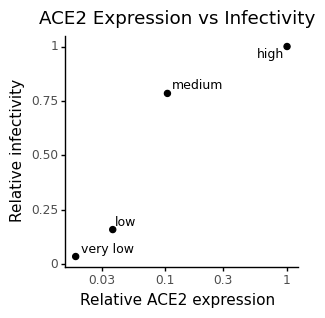

In [8]:
p =(
    ggplot(df)
    +aes(x="relative MFI", y="relative RLU/ul")
    +geom_point(size=2)
    +geom_text(mapping=aes(label='cells'),
               ha='left', 
               adjust_text={'expand_points': (1.2, 1.2),
                                    #'expand_text': (2.0, 2.0)
                           },
                size=9
              )            
                    
                
                
    +theme_classic()
    +theme(figure_size=(3,3))
    #+scale_color_manual(values=CBPALETTE)
    +labs(title="ACE2 Expression vs Infectivity", x="Relative ACE2 expression", y="Relative infectivity")
    +scale_x_log10()
)
p.draw()
p.save(f'{resultsdir}/ACE_Expression_vs_Infectivity.pdf')